TP FINAL DS

ALGORITMOS.
*   Regresion Logistica
*   Random Forest
*   BAYES







# Librerias

In [241]:
# Standard operational package imports.
import numpy as np
import pandas as pd
from scipy import stats

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
#from google.colab import drive
#drive.mount('/content/drive')

In [243]:
#load = files.upload()

# Carga de datos

In [244]:
df = pd.read_csv('Invistico_Airline.csv')

# EDA

In [245]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


2. Información general del DataFrame:



In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

**3. Resumen estadístico de las variables numéricas**



In [247]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


4. Identificar valores faltantes:



In [248]:
missing_values = df.isnull().sum()
data= df.dropna(axis=0).reset_index(drop = True)
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [249]:
print(data['satisfaction'].value_counts(dropna = False))
print()
print(data['satisfaction'].value_counts(normalize = True))

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

satisfaction
satisfied       0.547406
dissatisfied    0.452594
Name: proportion, dtype: float64


In [250]:
data = data.astype({'Inflight entertainment':float})
data['Inflight entertainment'].head(5)


0    4.0
1    2.0
2    0.0
3    4.0
4    3.0
Name: Inflight entertainment, dtype: float64

In [251]:
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


5. Visualización de datos:

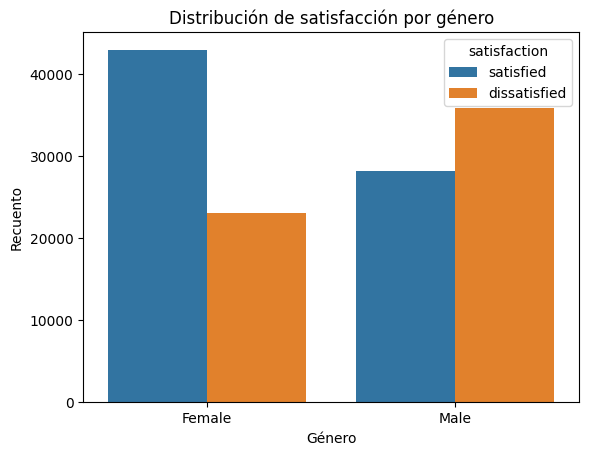

In [252]:
# Crear un gráfico de barras para la variable "Gender"
sns.countplot(data=df, x="Gender", hue="satisfaction")
plt.title("Distribución de satisfacción por género")
plt.xlabel("Género")
plt.ylabel("Recuento")
plt.show()


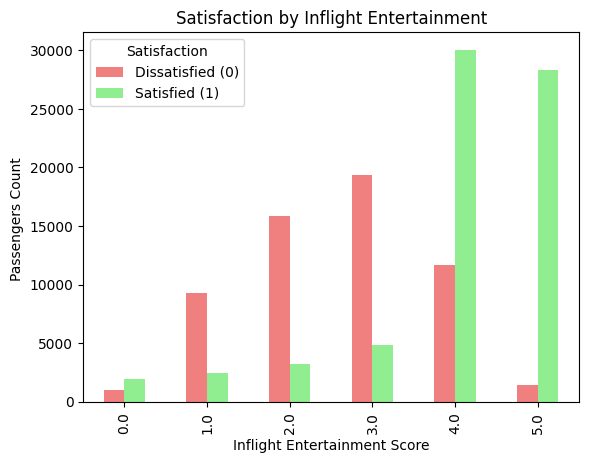

In [253]:
pd.crosstab(data['Inflight entertainment'], data['satisfaction']).plot(kind ='bar',color=['lightcoral','lightgreen'])
plt.title('Satisfaction by Inflight Entertainment')
plt.ylabel('Passengers Count ')
plt.xlabel('Inflight Entertainment Score')
plt.legend(['Dissatisfied (0)', 'Satisfied (1)'], title='Satisfaction')
plt.show()

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

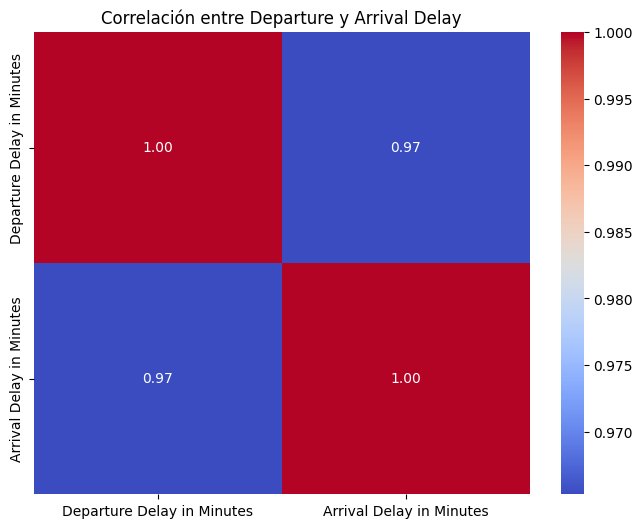

Correlación entre 'Departure Delay' y 'Arrival Delay': 0.97


In [255]:
# Calcular la correlación entre las dos columnas
correlation = data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr().iloc[0, 1]

# Visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Departure y Arrival Delay')
plt.show()

# Imprimir la correlación
print(f"Correlación entre 'Departure Delay' y 'Arrival Delay': {correlation:.2f}")


In [256]:
data.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

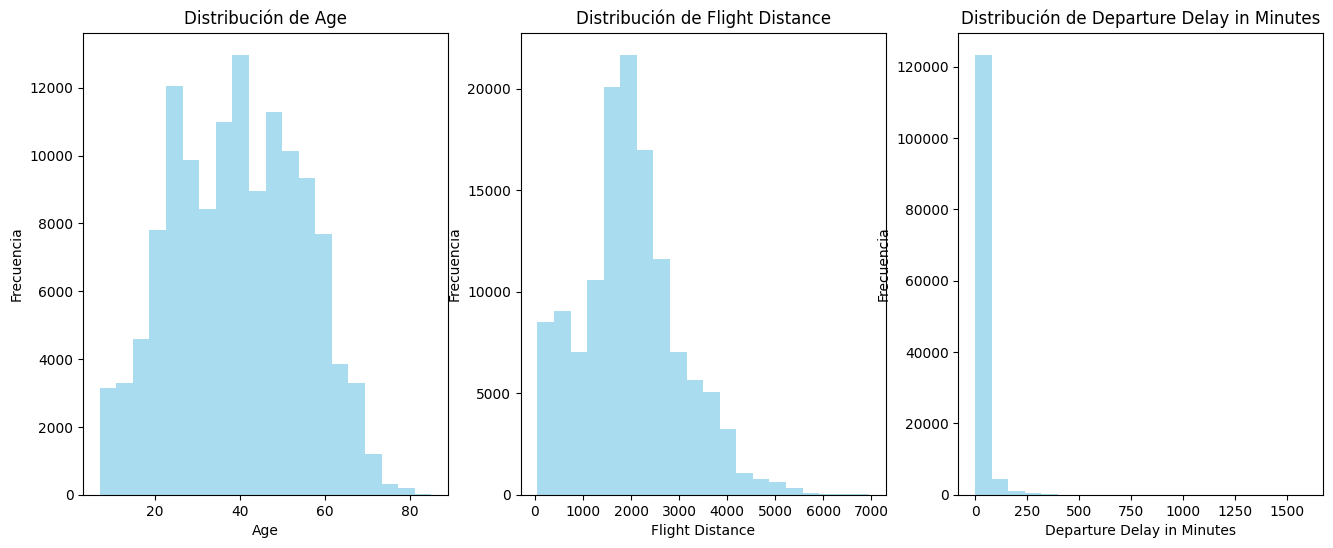

In [258]:
import matplotlib.pyplot as plt

# Variables numéricas que deseamos explorar
numeric_variables = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 6))

# Crear histogramas para cada variable
for i, variable in enumerate(numeric_variables):
    plt.subplot(1, len(numeric_variables), i + 1)
    plt.hist(data[variable], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.show()


In [259]:
descriptive_stats = data[numeric_variables].describe()

# Imprimir las estadísticas descriptivas
print(descriptive_stats)

                 Age  Flight Distance  Departure Delay in Minutes
count  129487.000000    129487.000000               129487.000000
mean       39.428761      1981.008974                   14.643385
std        15.117597      1026.884131                   37.932867
min         7.000000        50.000000                    0.000000
25%        27.000000      1359.000000                    0.000000
50%        40.000000      1924.000000                    0.000000
75%        51.000000      2543.000000                   12.000000
max        85.000000      6951.000000                 1592.000000


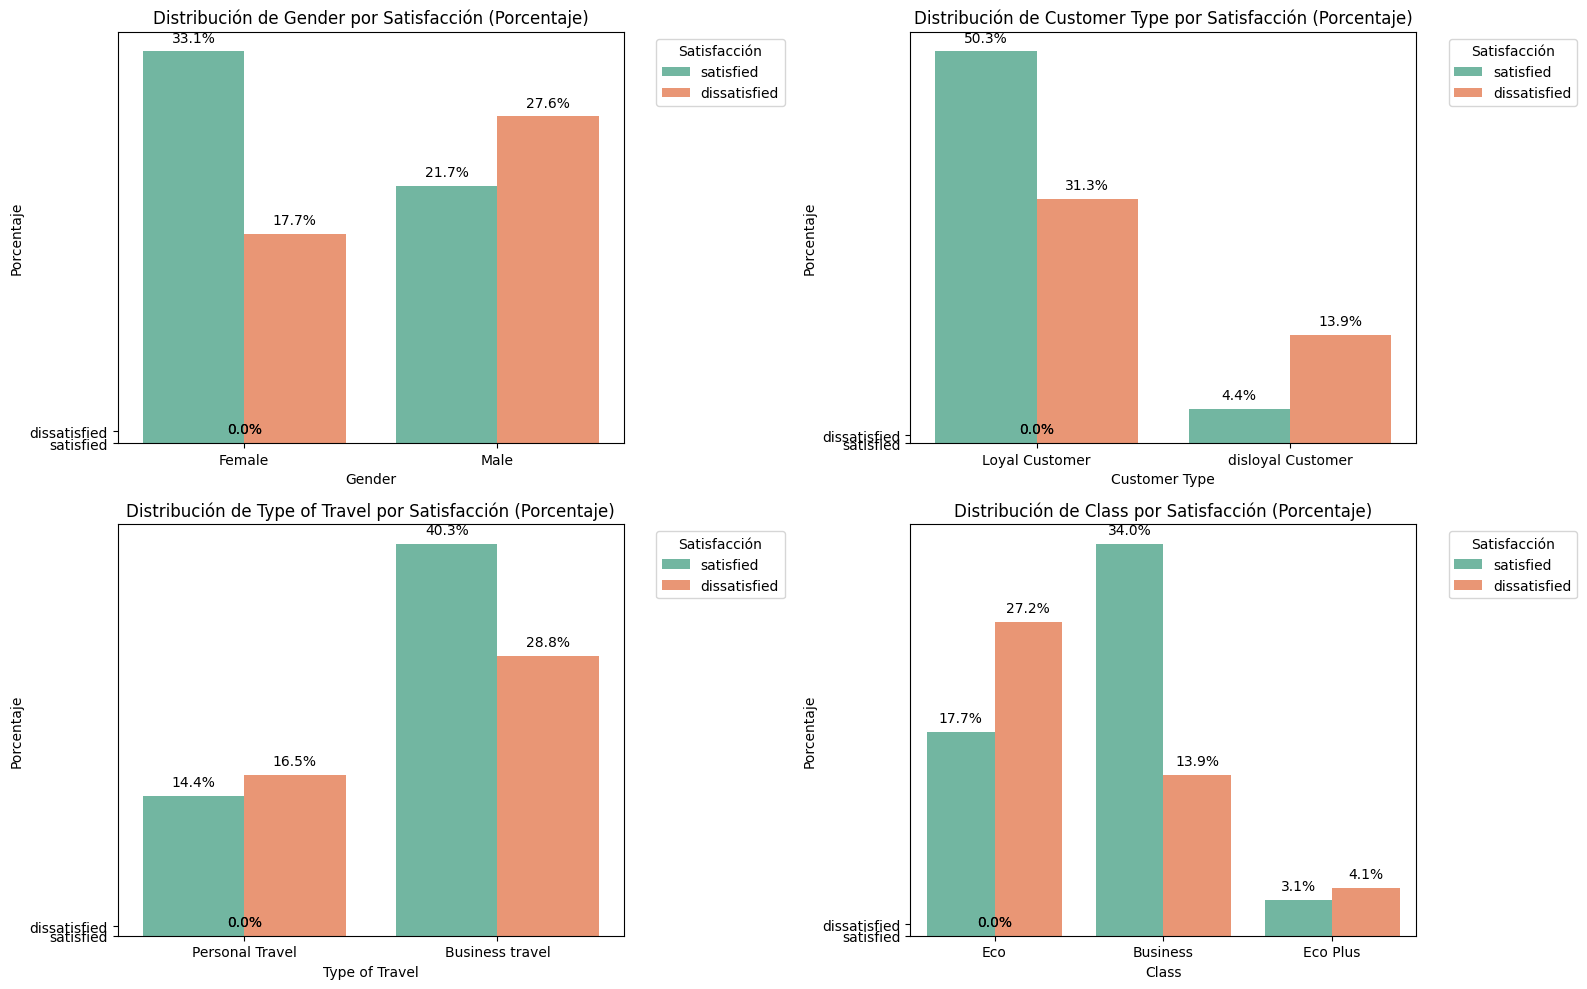

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas que deseamos explorar
categorical_variables = ["Gender", "Customer Type", "Type of Travel", "Class"]

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear gráficos de barras para cada variable categórica con el objetivo como 'hue'
for i, variable in enumerate(categorical_variables):
    plt.subplot(2, 2, i + 1)
    
    # Calcular los porcentajes en lugar de la cantidad
    total_counts = data[variable].value_counts()
    
    # Utilizar el parámetro 'order' para invertir la orientación de las barras
    ax = sns.barplot(x=variable, y="satisfaction", data=data, hue="satisfaction", palette="Set2", errorbar=None, estimator=lambda x: len(x) / len(data) * 100, order=data[variable].unique())
    
    plt.title(f'Distribución de {variable} por Satisfacción (Porcentaje)')
    plt.xlabel(variable)
    plt.ylabel('Porcentaje')
    # Mostrar la leyenda fuera de los subgráficos
    plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Invertir el eje y
    plt.gca().invert_yaxis()
    
    # Agregar etiquetas de porcentaje en la parte superior de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajustar el diseño de los subplots
plt.tight_layout()



# Mostrar los gráficos
plt.show()


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

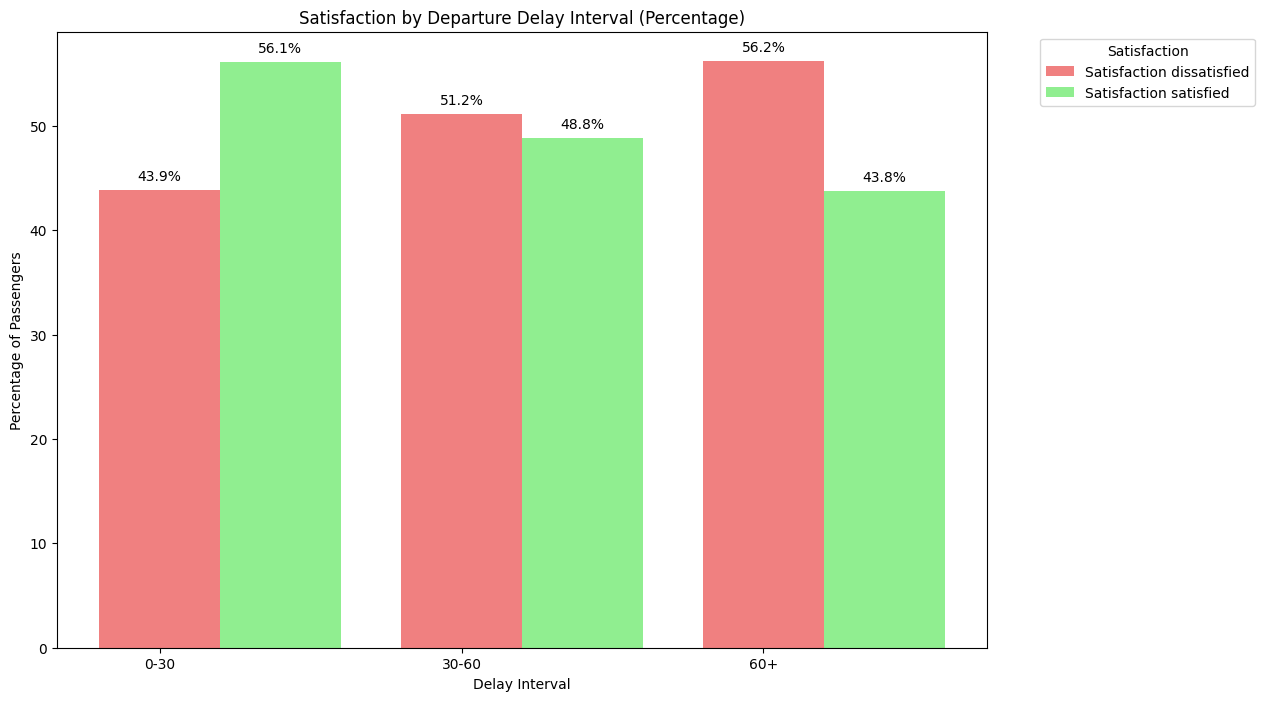

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el tiempo de retraso en intervalos (por ejemplo, 0-30 minutos, 30-60 minutos, más de 60 minutos)
data['Delay Interval'] = pd.cut(data['Departure Delay in Minutes'], bins=[-float('inf'), 30, 60, float('inf')], labels=['0-30', '30-60', '60+'], right=False)

# Crear una tabla de frecuencia cruzada entre "Delay Interval" y "satisfaction"
cross_tab = pd.crosstab(data['Delay Interval'], data['satisfaction'])

# Calcular los porcentajes en lugar de la cantidad
cross_tab_percentage = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Definir los colores para las barras
colors = ['lightcoral', 'lightgreen']

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Obtener la cantidad de intervalos de retraso
num_intervals = len(cross_tab_percentage.index)

# Configurar la posición de las barras
bar_width = 0.4  # Ajustar el ancho de las barras
index = range(num_intervals)

# Dibujar las barras
for i, category in enumerate(cross_tab_percentage.columns):
    plt.bar([pos + bar_width * i for pos in index], cross_tab_percentage[category], width=bar_width, label=f'Satisfaction {category}', color=colors[i])

# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Satisfaction by Departure Delay Interval (Percentage)')
plt.xlabel('Delay Interval')
plt.ylabel('Percentage of Passengers')
plt.xticks(index, cross_tab_percentage.index)  # Etiquetas en el eje X
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico

# Mostrar el gráfico
plt.show()


Por ultimo vamos a revisar como se distribuye la insatisfaccion por edad, para ubicar una estrategia segun la edad para mejorar la atencion

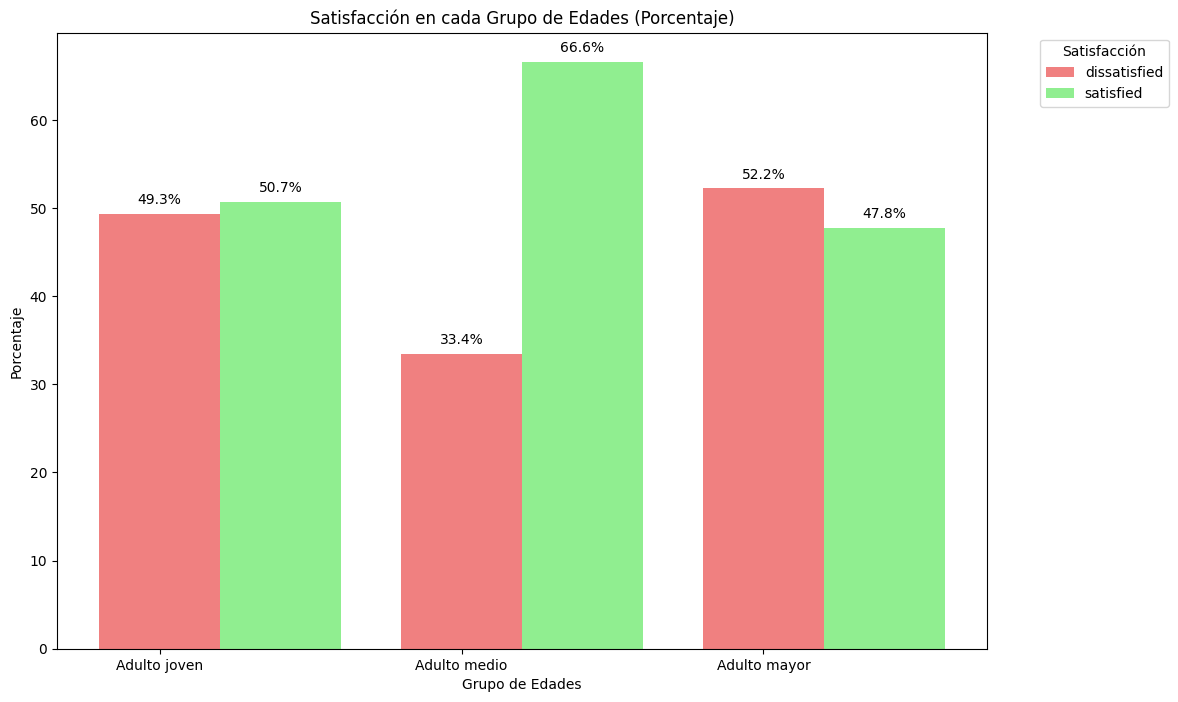

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los límites de los intervalos de edad para jóvenes, adultos y mayores
bins = [0, 45, 59, 200]

# Crear una nueva columna 'Age Group' en el DataFrame
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=['Adulto joven', 'Adulto medio', 'Adulto mayor'])

# Crear una tabla de contingencia para 'Age Group' y 'satisfaction'
ct = pd.crosstab(data['Age Group'], data['satisfaction'])

# Definir los colores para las barras
colors = ['lightcoral', 'lightgreen']

# Calcular los porcentajes en cada grupo de edad
ct_percentage = ct.div(ct.sum(1), axis=0) * 100

# Gráfico de barras para la satisfacción en cada grupo de edades (en porcentaje)
plt.figure(figsize=(12, 8))

# Obtener la cantidad de grupos de edades
num_age_groups = len(ct_percentage.index)

# Configurar la posición de las barras
bar_width = 0.4  # Ajustar el ancho de las barras
index = range(num_age_groups)

# Dibujar las barras
for i, category in enumerate(ct_percentage.columns):
    plt.bar([pos + bar_width * i for pos in index], ct_percentage[category], width=bar_width, label=category, color=colors[i])

# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Satisfacción en cada Grupo de Edades (Porcentaje)')
plt.xlabel('Grupo de Edades')
plt.ylabel('Porcentaje')
plt.xticks(index, ct_percentage.index)  # Etiquetas en el eje X
plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.show()


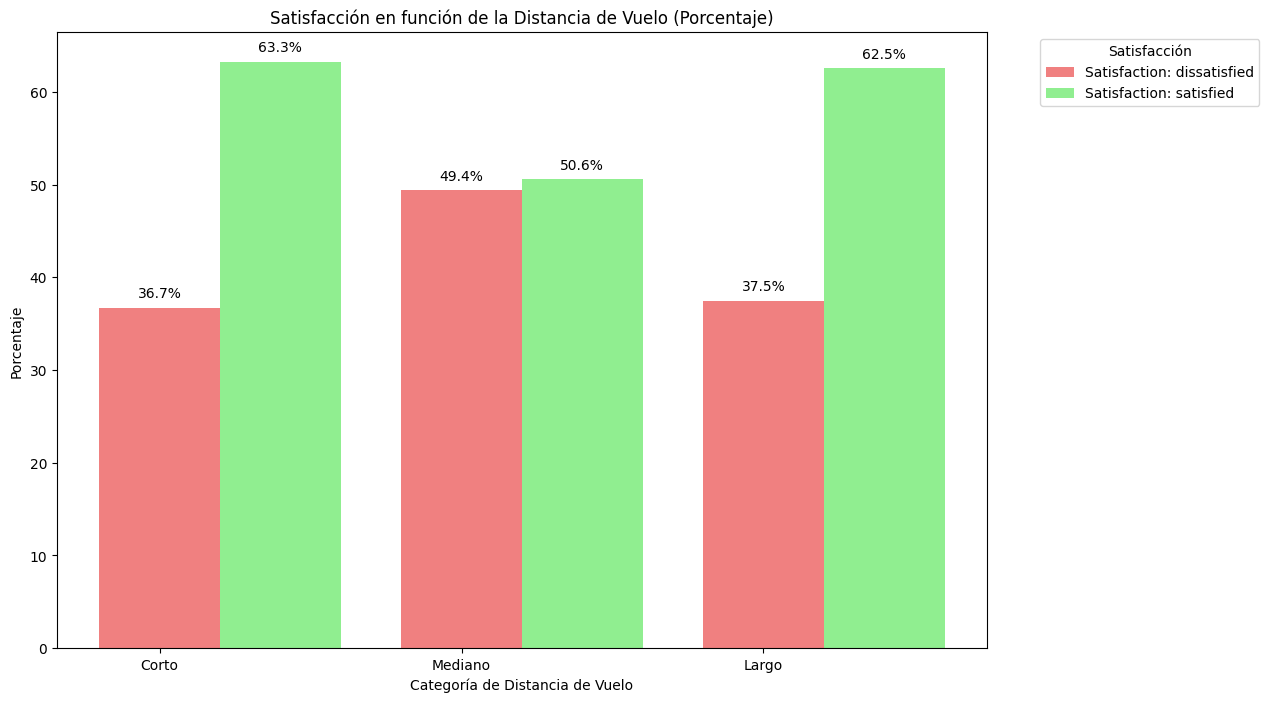

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir los límites de las distancias de vuelo
distance_bins = [0, 1500, 4000, np.inf]

# Etiquetas para las categorías
distance_labels = ['Corto', 'Mediano', 'Largo']

# Crear una nueva columna 'Flight Distance Category' en el DataFrame
data['Flight Distance Category'] = pd.cut(data['Flight Distance'], bins=distance_bins, labels=distance_labels, right=False)

# Crear una tabla de contingencia para 'Flight Distance Category' y 'satisfaction'
ct_distance = pd.crosstab(data['Flight Distance Category'], data['satisfaction'])

# Calcular los porcentajes en lugar de la cantidad
ct_distance_percentage = ct_distance.div(ct_distance.sum(1), axis=0) * 100

# Definir los colores para las barras
colors = ['lightcoral', 'lightgreen']

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Obtener la cantidad de categorías de distancia de vuelo
num_distance_categories = len(ct_distance_percentage.index)

# Configurar la posición de las barras
bar_width = 0.4  # Ajustar el ancho de las barras
index = range(num_distance_categories)

# Dibujar las barras
for i, category in enumerate(ct_distance_percentage.columns):
    plt.bar([pos + bar_width * i for pos in index], ct_distance_percentage[category], width=bar_width, label=f'Satisfaction: {category}', color=colors[i])

# Agregar etiquetas de porcentaje en la parte superior de cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Satisfacción en función de la Distancia de Vuelo (Porcentaje)')
plt.xlabel('Categoría de Distancia de Vuelo')
plt.ylabel('Porcentaje')
plt.xticks(index, ct_distance_percentage.index)  # Etiquetas en el eje X
plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico

# Mostrar el gráfico
plt.show()


vuelo corto mediano y largo, lo podemos usar para explicar en que tipo de vuelo hacer mas enfasis

In [265]:
data['satisfaction'] = OneHotEncoder(drop='first').fit_transform(data[['satisfaction']]).toarray()
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Delay Interval,Age Group,Flight Distance Category
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0-30,Adulto mayor,Corto
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,4,2,3,2,310,60+,Adulto medio,Mediano
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0-30,Adulto joven,Mediano
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,0,1,4,1,3,0,0-30,Adulto mayor,Corto
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,0,2,4,2,5,0,0-30,Adulto mayor,Corto


In [266]:
data.drop('Delay Interval', axis=1, inplace=True)


In [267]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Age Group,Flight Distance Category
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,Adulto mayor,Corto
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,Adulto medio,Mediano
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,Adulto joven,Mediano
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,Adulto mayor,Corto
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,Adulto mayor,Corto


# Modelos Post Viaje

**6. Manejo De Datos Categoricos**

Codificación one-hot para variables categóricas y estandarizacion para variables numericas utilizando pipelines

In [268]:
# Lista de características numéricas
numeric_features = [
    'Age',
    'Flight Distance',
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding',
    'Departure Delay in Minutes',
]

# Lista de características categóricas
categorical_features = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class'
]

# Transformers para características numéricas y categóricas 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

Creamos el Processor que sera utilizado en el pipeline

In [269]:
#creamos el processor para aplicar los transformers a las columnas apropiadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 8.1 Division de datos Con todos los features

In [270]:
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 Regresion Logistica con todos los Features

In [271]:
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logistic_regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in '
                                                   'Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier', LogisticRegression())])

In [273]:
# Realizar predicciones en el conjunto de prueba
logistic_regression_predictions = logistic_regression_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, logistic_regression_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calcular la precisión
precision = precision_score(y_test, logistic_regression_predictions)
print(f'Precision: {precision:.2f}')

# Calcular la exhaustividad (recall)
recall = recall_score(y_test, logistic_regression_predictions)
print(f'Recall: {recall:.2f}')

# Calcular la puntuación F1
f1 = f1_score(y_test, logistic_regression_predictions)
print(f'F1 Score: {f1:.2f}')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.83
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Confusion Matrix:
[[14443  3196]
 [ 3214 17994]]


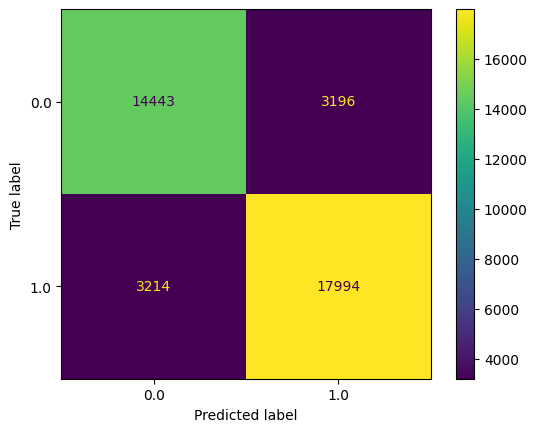

In [274]:
cm = metrics.confusion_matrix(y_test, logistic_regression_predictions, labels = logistic_regression_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = logistic_regression_model.classes_)
disp.plot()

In [275]:
# Calcular la probabilidad para la curva ROC
lr_prob = logistic_regression_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

 Random Forest

In [276]:
# Crea el pipeline que incluye el preprocesamiento y el modelo
rf_pipeline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42))
])

# Ajusta el pipeline a tus datos de entrenamiento
rf_pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in '
                                                   'Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=42))])

In [277]:
#predicciones en los datos de prueba
random_forest_predictions = rf_pipeline_model.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, random_forest_predictions)
print(accuracy)



0.8988081447730841


In [278]:
precision = precision_score(y_test, random_forest_predictions)
recall = recall_score(y_test, random_forest_predictions)
f1 = f1_score(y_test, random_forest_predictions)
print(f'Precisión: {precision}')
print(f'Sensibilidad (Recall): {recall}')
print(f'Puntuación F1: {f1}')


Precisión: 0.8964979115986598
Sensibilidad (Recall): 0.9209732176537155
Puntuación F1: 0.9085707640423305


Aplicaremos validacion cruzada

In [279]:
num_folds = 5

# Realiza la validación cruzada y obtén una lista de puntajes (precisión en este caso)
cross_val_scores = cross_val_score(rf_pipeline_model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Imprime los puntajes de validación cruzada
print("Puntajes de Validación Cruzada:", cross_val_scores)

# Calcula la media de los puntajes
mean_accuracy = cross_val_scores.mean()
print("Precisión Promedio:", mean_accuracy)

Puntajes de Validación Cruzada: [0.89938217 0.89728597 0.8994925  0.8994925  0.8951346 ]
Precisión Promedio: 0.8981575463371578


Ahora ubicaremos las caracteristicas mas importantes para analizarlas.

In [280]:
#las importancias de las características
importances = rf_pipeline_model.named_steps['classifier'].feature_importances_
print(importances)

[2.25031943e-03 3.76311385e-03 1.24080926e-01 5.17606145e-03
 2.80363989e-02 8.92583377e-04 6.72387720e-03 2.73001353e-01
 1.05359969e-01 9.61028881e-02 4.19302730e-02 4.43518668e-02
 1.57900446e-02 9.85765639e-03 1.16299988e-02 4.70466615e-02
 1.02423946e-03 2.31176040e-02 1.77226619e-02 3.58863759e-02
 3.50911022e-02 9.11017811e-03 1.49101143e-02 3.30118383e-02
 1.40057178e-02 1.26177160e-04]


In [281]:
# Obtener los nombres de las características después del One-Hot Encoding
categorical_features_encoded = (rf_pipeline_model.named_steps['preprocessor']
                                .named_transformers_['cat']
                                .named_steps['onehot']
                                .get_feature_names_out(input_features=categorical_features))

# Combinar los nombres de las características con sus importancias
feature_importance_df = pd.DataFrame({'Feature': list(numeric_features) + list(categorical_features_encoded),
                                      'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame de importancia de características
print(feature_importance_df)

                              Feature  Importance
7              Inflight entertainment    0.273001
2                        Seat comfort    0.124081
8                      Online support    0.105360
9              Ease of Online booking    0.096103
15                    Online boarding    0.047047
11                   Leg room service    0.044352
10                   On-board service    0.041930
19       Customer Type_Loyal Customer    0.035886
20    Customer Type_disloyal Customer    0.035091
23                     Class_Business    0.033012
4                      Food and drink    0.028036
17                      Gender_Female    0.023118
18                        Gender_Male    0.017723
12                   Baggage handling    0.015790
22     Type of Travel_Personal Travel    0.014910
24                          Class_Eco    0.014006
14                        Cleanliness    0.011630
13                    Checkin service    0.009858
21     Type of Travel_Business travel    0.009110


Usaremos un Grafico de barras para visualizar las caracteristicas mas importantes

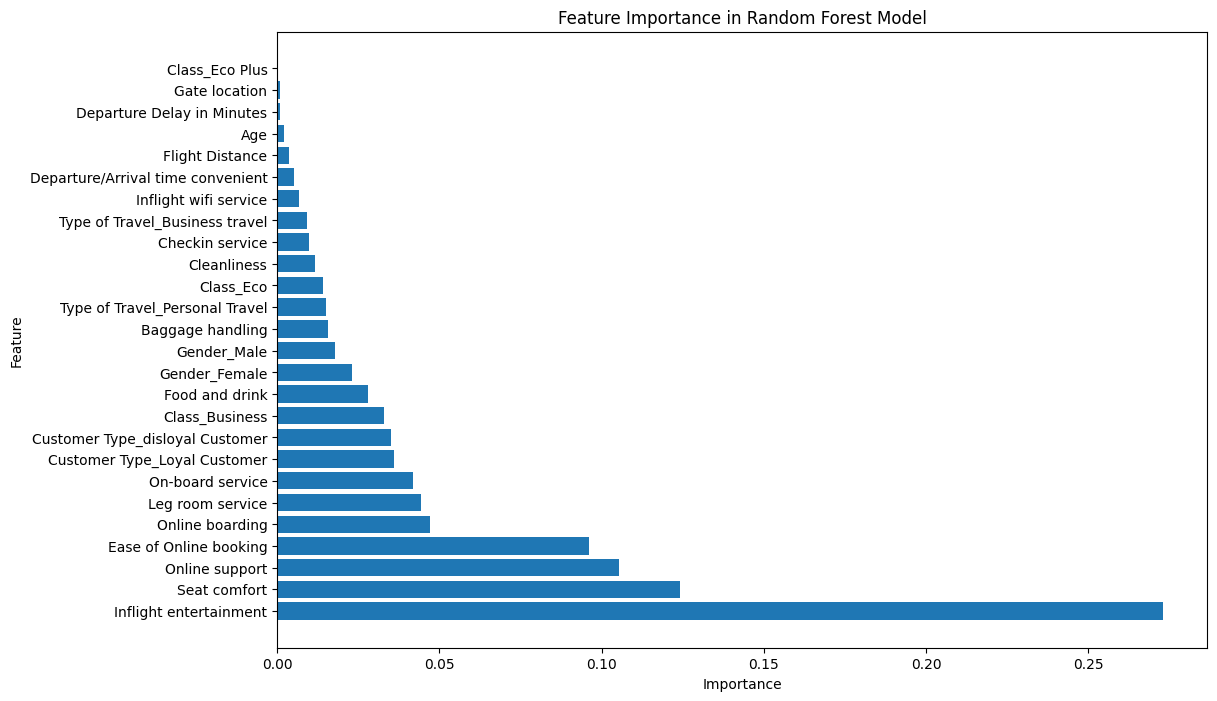

In [282]:
#gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

**Calculo de probabilidad para la curva de roc, despues lo utilizaremos para comparar los modelos**

In [283]:
# Calcular la probabilidad para la curva ROC
rf_prob = rf_pipeline_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

 BAYES

In [284]:
# Crear el modelo de Naive Bayes Gaussiano
bayes_model = GaussianNB()

# Crear el Pipeline
bayes_pipeline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', bayes_model)
])

bayes_pipeline_model.fit(X_train, y_train)
bayes_predictions = bayes_pipeline_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, bayes_predictions)
print("Precisión del modelo XGBoost:", accuracy)

# Muestra el informe de clasificación
print("Informe de clasificación:\n", classification_report(y_test, bayes_predictions))

# Muestra la matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, bayes_predictions))

Precisión del modelo XGBoost: 0.823152366978145
Informe de clasificación:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.81     17639
         1.0       0.84      0.83      0.84     21208

    accuracy                           0.82     38847
   macro avg       0.82      0.82      0.82     38847
weighted avg       0.82      0.82      0.82     38847

Matriz de confusión:
 [[14346  3293]
 [ 3577 17631]]


**Calculo de probabilidad para la curva de roc, despues lo utilizaremos para comparar los modelos**

In [285]:
# Calcular la probabilidad para la curva ROC
bayes_prob = bayes_pipeline_model.predict_proba(X_test)[:,1]
fpr_bayes, tpr_bayes, _ = roc_curve(y_test, bayes_prob)
roc_auc_bayes = auc(fpr_bayes, tpr_bayes)

Comparacion de modelos

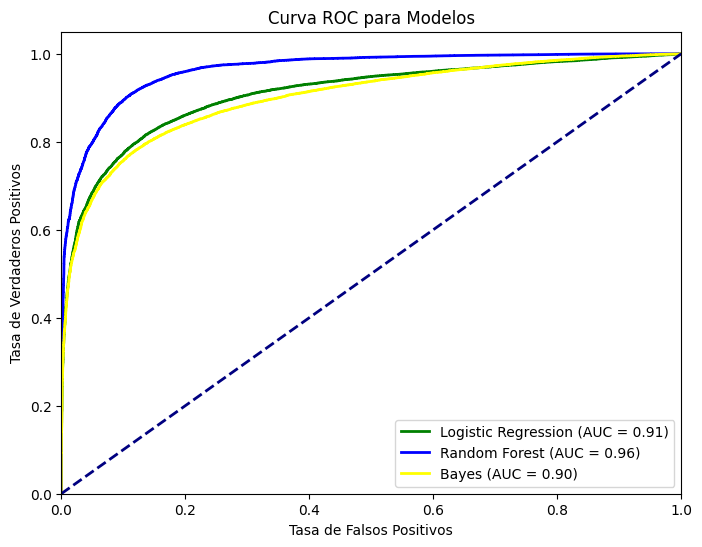

In [286]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_bayes,tpr_bayes, color='yellow', lw=2, label='Bayes (AUC = %0.2f)' % roc_auc_bayes)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Modelos')
plt.legend(loc='lower right')
plt.show()

# Modelo para interpretar los datos tratando de ubicar algun patron en los datos

In [287]:
# Definir características y etiqueta
features = ['Age', 'Flight Distance', 'Seat comfort','Gender', 'Departure/Arrival time convenient', 'Food and drink',
            'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support',
            'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Cleanliness','Customer Type', 'Online boarding', 'Departure Delay in Minutes','Type of Travel','Class']

target = 'satisfaction'  # Nombre de la columna que indica la satisfacción del cliente

# Dividir el conjunto de datos en clientes satisfechos e insatisfechos
clientes_satisfechos = data[data[target] == 1]
clientes_insatisfechos = data[data[target] == 0]


In [288]:
# Crea el pipeline que incluye el preprocesamiento y el modelo
rf_pipeline_model_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42))
])

# Ajusta el pipeline a tus datos de entrenamiento
rf_pipeline_model_2.fit(data[features], data[target])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in '
                                                   'Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=42))])

In [289]:
# Obtén las importancias de las características
importances = rf_pipeline_model_2.named_steps['classifier'].feature_importances_
print(importances)

[2.18203298e-03 4.35625457e-03 1.19204202e-01 4.87145792e-03
 3.11392838e-02 7.39402092e-04 7.78183506e-03 3.04602450e-01
 8.93921450e-02 1.07143941e-01 4.16439707e-02 4.69739890e-02
 1.68192050e-02 9.19674488e-03 1.14218942e-02 3.72541310e-02
 7.50301449e-04 2.08024057e-02 1.63786064e-02 3.22450363e-02
 3.23730703e-02 8.81242253e-03 1.27781857e-02 2.89547645e-02
 1.20611168e-02 1.21150373e-04]


In [290]:
# Obtén los nombres de las características después del One-Hot Encoding
categorical_features_encoded = (rf_pipeline_model_2.named_steps['preprocessor']
                                .named_transformers_['cat']
                                .named_steps['onehot']
                                .get_feature_names_out(input_features=categorical_features))

# Combina los nombres de las características con sus importancias
feature_importance_df = pd.DataFrame({'Feature': list(numeric_features) + list(categorical_features_encoded),
                                      'Importance': importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprime el DataFrame de importancia de características
print(feature_importance_df)

                              Feature  Importance
7              Inflight entertainment    0.304602
2                        Seat comfort    0.119204
9              Ease of Online booking    0.107144
8                      Online support    0.089392
11                   Leg room service    0.046974
10                   On-board service    0.041644
15                    Online boarding    0.037254
20    Customer Type_disloyal Customer    0.032373
19       Customer Type_Loyal Customer    0.032245
4                      Food and drink    0.031139
23                     Class_Business    0.028955
17                      Gender_Female    0.020802
12                   Baggage handling    0.016819
18                        Gender_Male    0.016379
22     Type of Travel_Personal Travel    0.012778
24                          Class_Eco    0.012061
14                        Cleanliness    0.011422
13                    Checkin service    0.009197
21     Type of Travel_Business travel    0.008812


In [291]:
# Utiliza rf_pipeline_model_2 para hacer predicciones
predicciones_satisfechos = rf_pipeline_model_2.predict(clientes_satisfechos[features])
predicciones_insatisfechos = rf_pipeline_model_2.predict(clientes_insatisfechos[features])

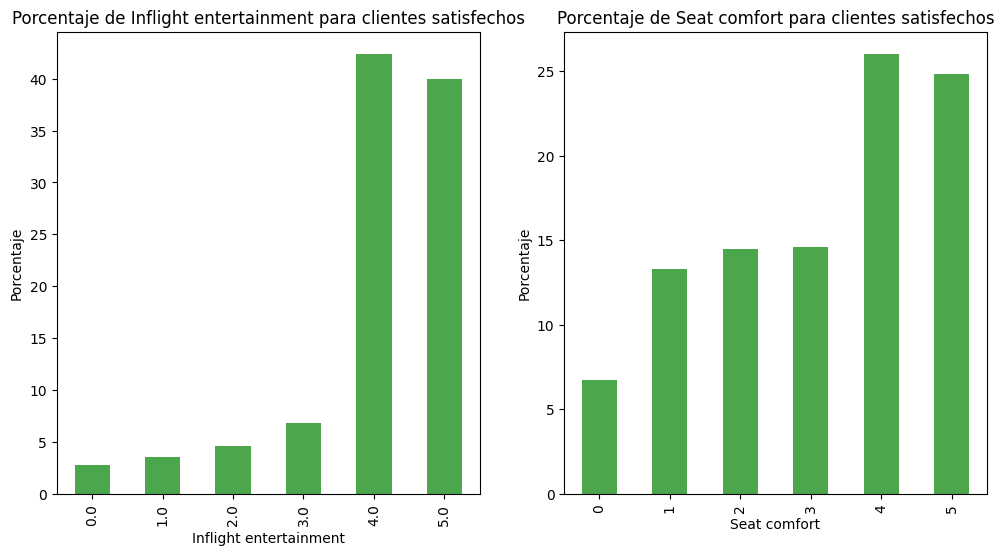

In [292]:
# Feature de interés (por ejemplo, 'Inflight entertainment' y 'Seat comfort')
feature1 = 'Inflight entertainment'
feature2 = 'Seat comfort'

# Calcular porcentajes del total de clientes satisfechos
porcentaje_feature1 = (clientes_satisfechos[feature1].value_counts(normalize=True) * 100).sort_index()
porcentaje_feature2 = (clientes_satisfechos[feature2].value_counts(normalize=True) * 100).sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
porcentaje_feature1.plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Porcentaje de {feature1} para clientes satisfechos')
plt.xlabel(feature1)
plt.ylabel('Porcentaje')

plt.subplot(1, 2, 2)
porcentaje_feature2.plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Porcentaje de {feature2} para clientes satisfechos')
plt.xlabel(feature2)
plt.ylabel('Porcentaje')

plt.show()


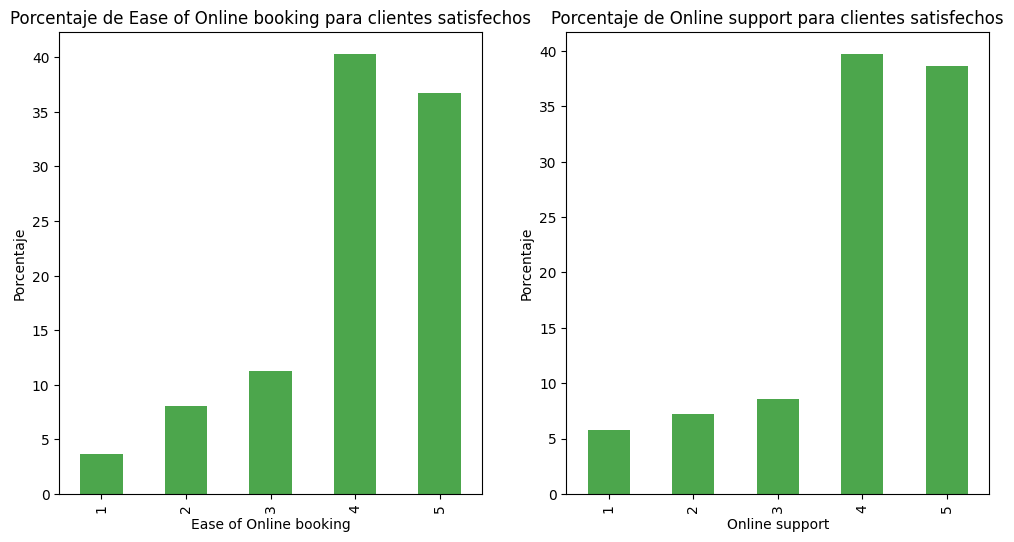

In [293]:
# Features de interés
feature3 = 'Ease of Online booking'
feature4 = 'Online support'

# Calcular porcentajes del total de clientes satisfechos
porcentaje_feature3_satisfechos = (clientes_satisfechos[feature3].value_counts(normalize=True) * 100).sort_index()
porcentaje_feature4_satisfechos = (clientes_satisfechos[feature4].value_counts(normalize=True) * 100).sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

# Visualización para "Ease of Online booking"
plt.subplot(1, 2, 1)
porcentaje_feature3_satisfechos.plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Porcentaje de {feature3} para clientes satisfechos')
plt.xlabel(feature3)
plt.ylabel('Porcentaje')

# Visualización para "Online support"
plt.subplot(1, 2, 2)
porcentaje_feature4_satisfechos.plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Porcentaje de {feature4} para clientes satisfechos')
plt.xlabel(feature4)
plt.ylabel('Porcentaje')

plt.show()


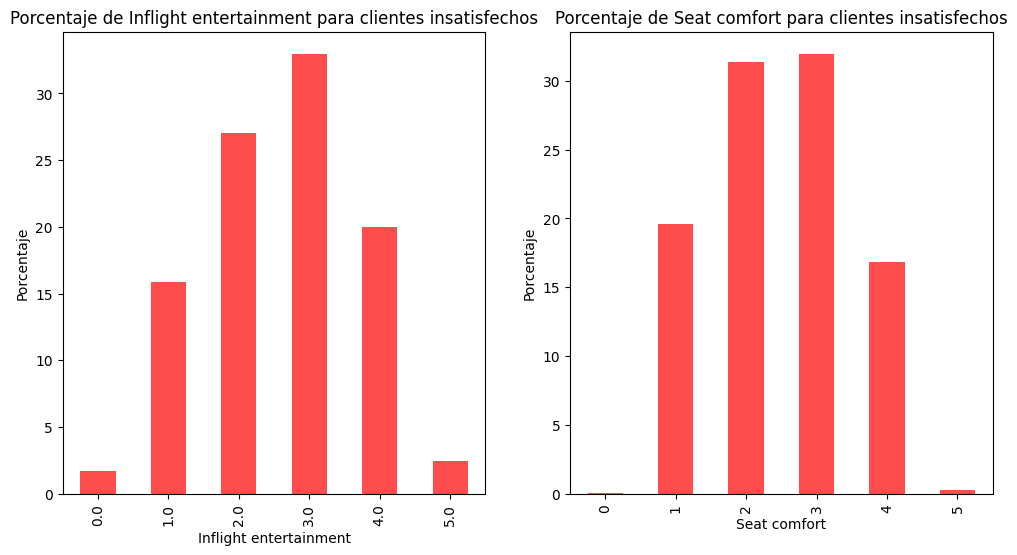

In [294]:
# Features de interés
feature1 = 'Inflight entertainment'
feature2 = 'Seat comfort'

# Calcular porcentajes del total de clientes insatisfechos
porcentaje_feature1_insatisfechos = (clientes_insatisfechos[feature1].value_counts(normalize=True) * 100).sort_index()
porcentaje_feature2_insatisfechos = (clientes_insatisfechos[feature2].value_counts(normalize=True) * 100).sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

# Visualización para "Inflight entertainment"
plt.subplot(1, 2, 1)
porcentaje_feature1_insatisfechos.plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Porcentaje de {feature1} para clientes insatisfechos')
plt.xlabel(feature1)
plt.ylabel('Porcentaje')

# Visualización para "Seat comfort"
plt.subplot(1, 2, 2)
porcentaje_feature2_insatisfechos.plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Porcentaje de {feature2} para clientes insatisfechos')
plt.xlabel(feature2)
plt.ylabel('Porcentaje')

plt.show()


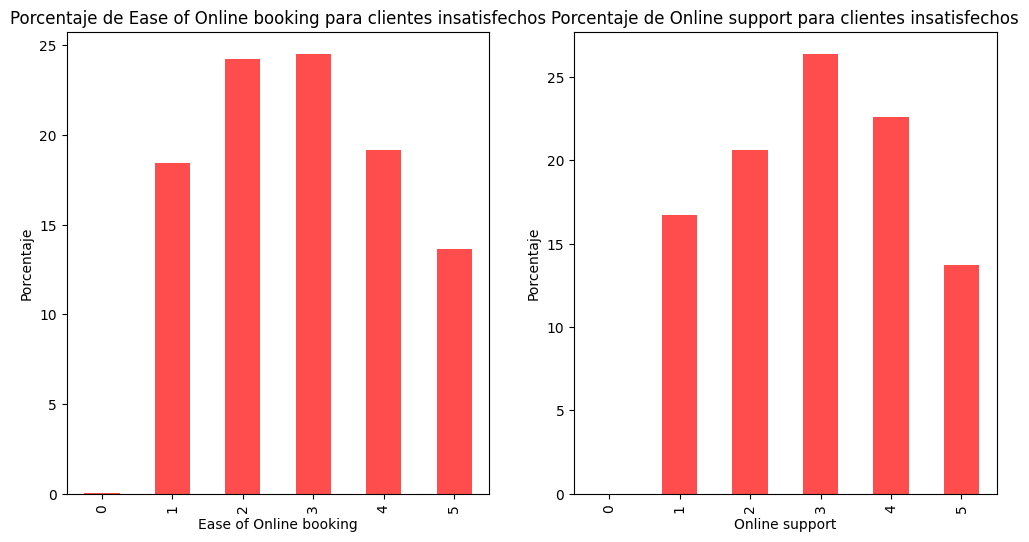

In [295]:
# Features de interés
feature3 = 'Ease of Online booking'
feature4 = 'Online support'

# Calcular porcentajes del total de clientes insatisfechos
porcentaje_feature3_insatisfechos = (clientes_insatisfechos[feature3].value_counts(normalize=True) * 100).sort_index()
porcentaje_feature4_insatisfechos = (clientes_insatisfechos[feature4].value_counts(normalize=True) * 100).sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))

# Visualización para "Ease of Online booking"
plt.subplot(1, 2, 1)
porcentaje_feature3_insatisfechos.plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Porcentaje de {feature3} para clientes insatisfechos')
plt.xlabel(feature3)
plt.ylabel('Porcentaje')

# Visualización para "Online support"
plt.subplot(1, 2, 2)
porcentaje_feature4_insatisfechos.plot(kind='bar', color='red', alpha=0.7)
plt.title(f'Porcentaje de {feature4} para clientes insatisfechos')
plt.xlabel(feature4)
plt.ylabel('Porcentaje')

plt.show()


In [296]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Age Group,Flight Distance Category
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,Adulto mayor,Corto
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,Adulto medio,Mediano
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,Adulto joven,Mediano
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,Adulto mayor,Corto
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,Adulto mayor,Corto


# Modelo Random Forest Pre-Viaje

Seleccion de los features

In [297]:
selected_features = [
    'Gender',
    'Customer Type',
    'Age',
    'Type of Travel',
    'Class',
    'Flight Distance',
    'Departure Delay in Minutes',
    'satisfaction'
]

# Filtrar el DataFrame
filtered_data = data[selected_features]

In [298]:
# Lista de características numéricas
numeric_features = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
]

# Lista de características categóricas
categorical_features = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class'
]

# Transformers para características numéricas y categóricas 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

Creacion del preprocessor

In [299]:
#creamos el processor para aplicar los transformers a las columnas apropiadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [300]:
filtered_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,1.0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,310,1.0
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,1.0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,1.0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,1.0


Separacion de datos y conversion para variables categoricas

In [301]:
# Seleccionamos características y target
features = filtered_data.drop('satisfaction', axis=1)
target = filtered_data['satisfaction']

In [302]:
features.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,310
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0


Separacion en conjunto de entrenamiento y prueba

In [303]:
# Dividimos los datos en conjuntos de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

Iniciamos el modelo Random Forest

In [304]:
rf_model_B = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42,max_depth=5,min_samples_split=2, min_samples_leaf=1,max_features='sqrt'))
])

In [305]:
# Entrenar el modelo
rf_model_B.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model_B.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

Metricas del modelo

In [306]:
# Imprimir resultados
print("Accuracy:", accuracy)
print(f'Precisión: {precision}')
print(f'Sensibilidad (Recall): {recall}')
print(f'Puntuación F1: {f1}')
print("\nClassification Report:\n", report)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Accuracy: 0.78657296573738
Precisión: 0.8964979115986598
Sensibilidad (Recall): 0.9209732176537155
Puntuación F1: 0.9085707640423305

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.70      0.75     17639
         1.0       0.78      0.86      0.81     21208

    accuracy                           0.79     38847
   macro avg       0.79      0.78      0.78     38847
weighted avg       0.79      0.79      0.78     38847



Ejemplo de 1 arbon del bosque

In [307]:
# Obtener las importancias de las características
importances = rf_model_B.named_steps['classifier'].feature_importances_
print(importances)

[0.04607996 0.02684005 0.01497416 0.11479275 0.15314133 0.11202168
 0.11438628 0.0761656  0.08660979 0.16015737 0.08440187 0.01042916]


In [308]:
# Obtener los nombres de las características después del One-Hot Encoding
categorical_features_encoded = (rf_model_B.named_steps['preprocessor']
                                .named_transformers_['cat']
                                .named_steps['onehot']
                                .get_feature_names_out(input_features=categorical_features))

# Combinar los nombres de las características con sus importancias
feature_importance_df = pd.DataFrame({'Feature': list(numeric_features) + list(categorical_features_encoded),
                                      'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame de importancia de características
print(feature_importance_df)

                            Feature  Importance
9                    Class_Business    0.160157
4                       Gender_Male    0.153141
3                     Gender_Female    0.114793
6   Customer Type_disloyal Customer    0.114386
5      Customer Type_Loyal Customer    0.112022
8    Type of Travel_Personal Travel    0.086610
10                        Class_Eco    0.084402
7    Type of Travel_Business travel    0.076166
0                               Age    0.046080
1                   Flight Distance    0.026840
2        Departure Delay in Minutes    0.014974
11                   Class_Eco Plus    0.010429


Obtener features mas importantes

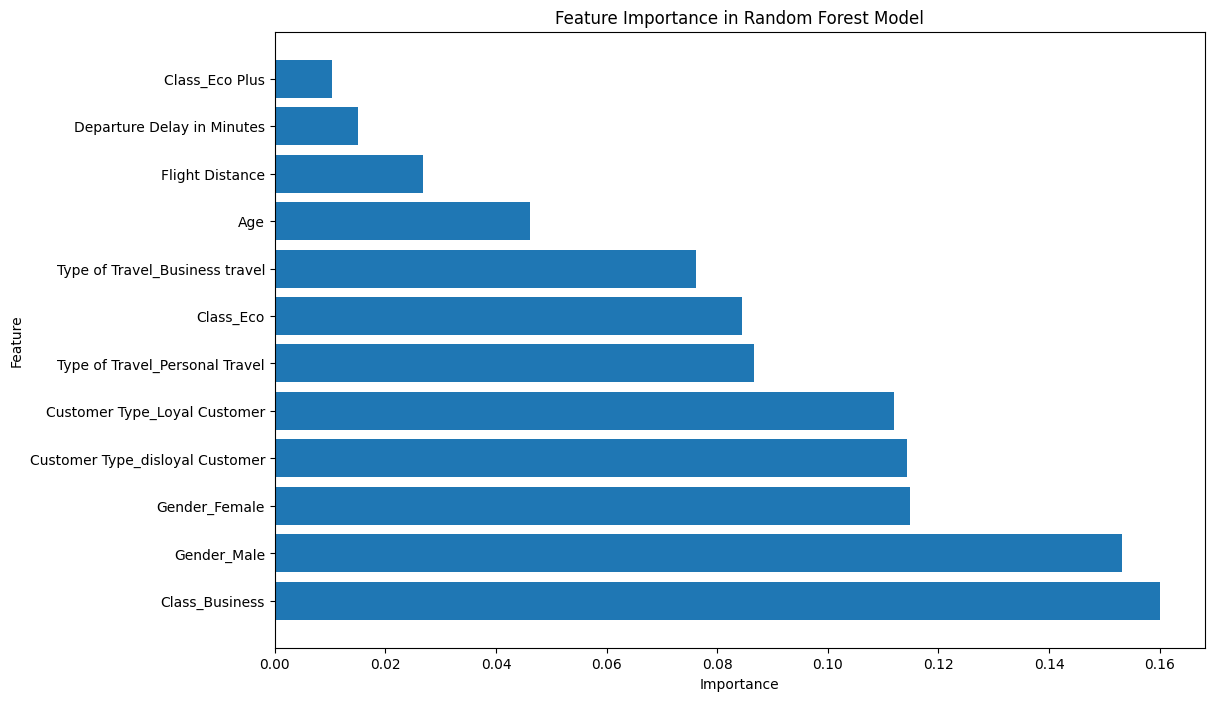

In [309]:
#gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

Calculamos la curva de Roc

Área bajo la curva (AUC): 0.8441701305226885


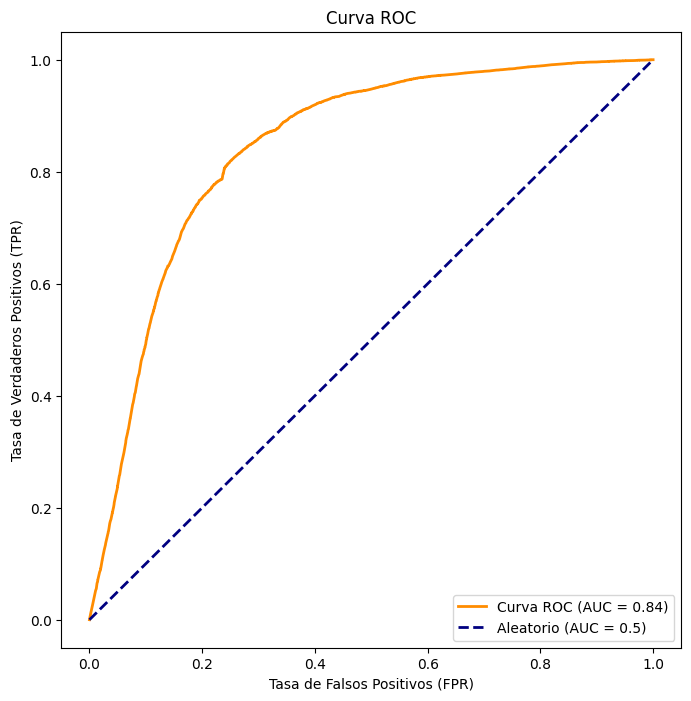

In [310]:
# Obtener probabilidades de predicción para las clases
y_probs = rf_model_B.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Imprimir el área bajo la curva
print("Área bajo la curva (AUC):", roc_auc)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()